In [ ]:
  !pip install yfinance -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.0/73.0 kB 1.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.0/5.0 MB 24.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.8/116.8 kB 11.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 82.3 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.2/112.2 kB 9.8 MB/s eta 0:00:00


In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
import plotly.graph_objects as go


In [19]:
AAPL = yf.Ticker("AAPL")

retrieves historical price data for the stock.

In [20]:
df_hist = AAPL.history(period="max")
df_hist.tail(5)

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2024-04-18 00:00:00-04:00,168.029999,168.639999,166.550003,167.039993,43122900,0.0,0.0
2024-04-19 00:00:00-04:00,166.210007,166.399994,164.080002,165.000000,67772100,0.0,0.0
2024-04-22 00:00:00-04:00,165.520004,167.259995,164.770004,165.839996,48116400,0.0,0.0
2024-04-23 00:00:00-04:00,165.350006,167.050003,164.919998,166.899994,49537800,0.0,0.0
2024-04-24 00:00:00-04:00,166.539993,169.300003,166.210007,169.020004,48121300,0.0,0.0


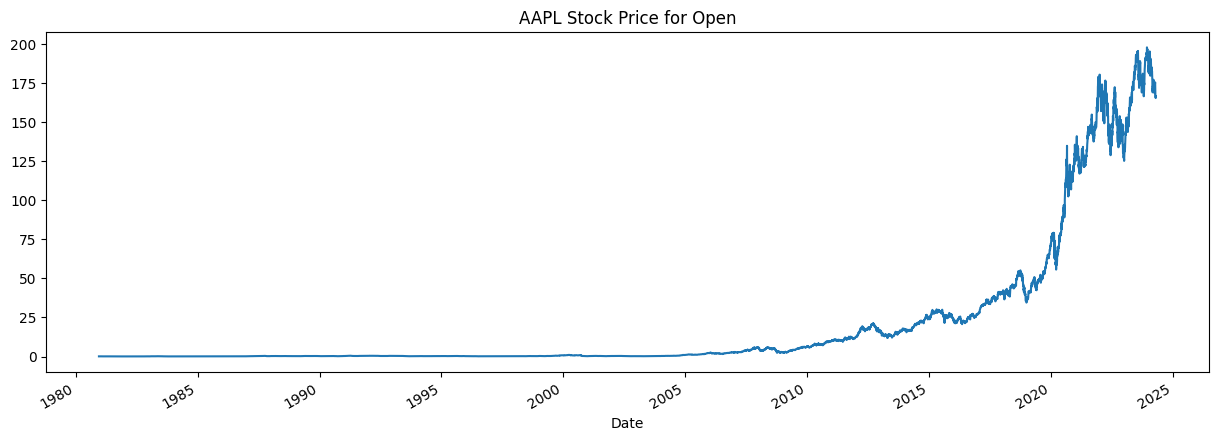

In [21]:
df_hist["Open"].plot(figsize=(15, 5), title="AAPL Stock Price for Open")
plt.show()

In [22]:
df= pd.read_csv("apple-news_data.csv")
df.head()

,date,content,headlines
0,2024-04-05T15:38:08Z,Apple CEO Tim CookYves Herman/Reuters\r\n<ul>\...,Apple focusing on home robots over AI would be...
1,2024-03-22T16:12:24Z,Meta Quest 2 the popular virtual reality (VR) ...,Meta Quest 2 price drops to below $200
2,2024-04-17T13:28:12Z,Smith Collection/Gado; Maja Hitij/Getty Images...,Tesla's awful 2024 is getting much worse
3,2024-04-08T13:44:00Z,BI\r\n<ul><li>This post originally appeared in...,China's plan for reinvigorating its economy ha...
4,2024-04-02T12:00:38Z,Justin Sullivan/Getty Images\r\n<ul><li>This p...,Wall Street is getting nervous about Tesla


In [23]:
!pip install transformers pandas
!pip install torch

In [32]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification


In [33]:
# Choose a pre-trained DistilBERT model for sentiment analysis
model_name = "distilbert-base-uncased-finetuned-sst-2-english"

tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained(model_name)


In [34]:
df["content"]

0     Apple CEO Tim CookYves Herman/Reuters\r\n<ul>\...
1     Meta Quest 2 the popular virtual reality (VR) ...
2     Smith Collection/Gado; Maja Hitij/Getty Images...
3     BI\r\n<ul><li>This post originally appeared in...
4     Justin Sullivan/Getty Images\r\n<ul><li>This p...
                            ...                        
95    WASHINGTON (AP) The Justice Department on Thur...
96    Apple Inc. (NASDAQ:AAPL – Get Free Report)’s s...
97    The Justice Department on Thursday announced a...
98    Disney CEO Bob Iger on Wednesday fended off an...
99    The X167-generation Mercedes-Benz GLS facelift...
Name: content, Length: 100, dtype: object

In [39]:
import torch

def predict_sentiment(text, tokenizer, model):
  encoded_text = tokenize_text(text)
  with torch.no_grad():
    output = model(**encoded_text)
    predictions = torch.nn.functional.softmax(output.logits, dim=-1)
    sentiment = torch.argmax(predictions).item()

    # Map sentiment index to labels (optional)
    sentiment_labels = ["Positive", "Negative", "Neutral"]  # Modify based on your model
    return sentiment_labels[sentiment]


In [40]:
df["sentiment"] = df["content"].apply(lambda x: predict_sentiment(x, tokenizer, model))

print(df.head())  # View the first few rows including the new 'sentiment' column


                   date                                            content  \
0  2024-04-05T15:38:08Z  Apple CEO Tim CookYves Herman/Reuters\r\n<ul>\...   
1  2024-03-22T16:12:24Z  Meta Quest 2 the popular virtual reality (VR) ...   
2  2024-04-17T13:28:12Z  Smith Collection/Gado; Maja Hitij/Getty Images...   
3  2024-04-08T13:44:00Z  BI\r\n<ul><li>This post originally appeared in...   
4  2024-04-02T12:00:38Z  Justin Sullivan/Getty Images\r\n<ul><li>This p...   

                                           headlines sentiment  
0  Apple focusing on home robots over AI would be...  Positive  
1             Meta Quest 2 price drops to below $200  Positive  
2           Tesla's awful 2024 is getting much worse  Positive  
3  China's plan for reinvigorating its economy ha...  Negative  
4         Wall Street is getting nervous about Tesla  Negative  
